In [ ]:
# the required packages
pip install pennylane numpy pandas sklearn

In [ ]:
# import the required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,classification_report,f1_score
# for the quantum
import pennylane as qml

Dataset

In [3]:
iris = load_iris()
dataset=pd.DataFrame(iris.data,columns=iris.feature_names)
dataset["target"]=iris.target
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
features= dataset[dataset.columns[1:4]]
target=dataset["target"]

In [6]:
# split the data into training set and testing set 
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.25,random_state=42)

In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
X_train=minmax.fit_transform(X_train)
X_test=minmax.transform(X_test)
X_test=np.clip(X_test,0,1)

In [2]:
import base64

image_path = "figures/QK-SVM.png"  # Replace with your image file path
with open(image_path, "rb") as img_file:
    encoded_string = base64.b64encode(img_file.read()).decode("utf-8")

print(encoded_string)

iVBORw0KGgoAAAANSUhEUgAAAiwAAAGrCAYAAADjKswUAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAJPkSURBVHhe7N13WBPZ1wfwbxISOtIFFVFQFLBX7Nh7b6hrWVexK4q9Y8HeEF1sa3ddxb62tYC9iw0LRURBuiA9Icm8f/x0Xmew0SQJ5/M88yz33DMjDGxycufOHQHDMAwIIYQQQlSYkB8ghBBCCFE1VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROVRwUIIIYQQlUcFCyGEEEJUHhUshBBCCFF5VLAQQgghROUJGIZh+EFCSprIyEi8fv0a7969Q2pqKmQyGRQKBT/tlxOJRNDW1kapUqVQvnx52NnZoVy5cvw0tRUbG4vXr18jMjISycnJkEqlkMvl/LRfTiAQQFtbGwYGBihTpgzs7OxQsWJFaGlp8VPV0ocPHxAREYHXr18jKSkJUqkUMpmMn1YstLW1oaOjA0tLS/a8Gxoa8tNICUQFCymR7t+/j2PHjuHy5cuIjo5GTk4OcnJyIJfLoVQq

# Classical Support Vector Machine

## Overview

Support Vector Machines (SVMs) are a powerful set of supervised learning algorithms mainly used for classification. The main idea is to find a hyperplane that best separates data points from different classes. For a binary classification problem, this hyperplane is defined in such a way that it **maximizes the margin**—the distance between the hyperplane and the closest data points (the “support vectors”) of any class.

## The Kernel Trick
<div style="text-align: center;">
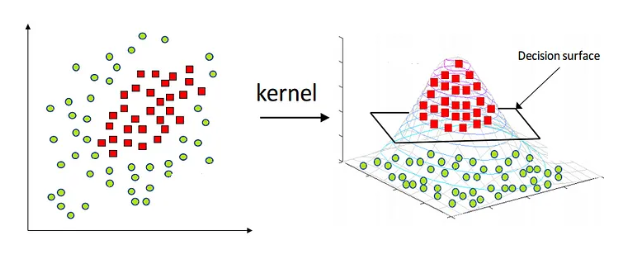
</div>



In many real-world cases, the data is not linearly separable in its original feature space. To handle this, SVMs use a method called the **kernel trick**:

- **Implicit Mapping**:  
  The kernel trick involves implicitly mapping the input data into a higher-dimensional feature space where a linear separation is possible. Instead of explicitly transforming each data point using a mapping function $\phi(x)$, the kernel function $K(x_i, x_j)$ computes the inner product $\langle \phi(x_i), \phi(x_j) \rangle$ directly. This approach avoids the computational cost of handling high-dimensional spaces explicitly.

- **Decision Function with Kernel**:  
  With the kernel trick, the SVM decision function is expressed as:

  $$
  \hat{y}(x) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i\, y_i\, K(x_i, x) + b\right)
  $$

  where:
  - $\alpha_i$ are the Lagrange multipliers obtained from the optimization problem,
  - $y_i$ are the class labels,
  - $K(x_i, x)$ is the kernel function, and
  - $b$ is the bias term.

## Common Kernel Functions

Several kernel functions are commonly employed, each suitable for different types of data and decision boundaries:

- **Linear Kernel**:
  
  $$
  K(x_i, x_j) = x_i^\top x_j
  $$
  
  This kernel does not transform the data and is equivalent to the standard dot product. It is effective when the data is approximately linearly separable.

- **Polynomial Kernel**:
  
  $$
  K(x_i, x_j) = (\gamma\, x_i^\top x_j + r)^d
  $$

  **Parameters**:
  - $d$: Degree of the polynomial.
  - $\gamma$ and $r$: Parameters that adjust the scaling and offset.

  This kernel allows for curved boundaries and can capture more complex relationships.

- **Radial Basis Function (RBF) Kernel**:
  
  $$
  K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right)
  $$

  **Parameter**:
  - $\gamma$: Determines the width of the Gaussian function.

  The RBF kernel is highly effective for non-linear problems because it can create very flexible boundaries around classes.

- **Other Kernels**:  
  There are also other kernel functions (e.g., sigmoid kernel) that may be used depending on the specific characteristics of the data.


In [8]:
import time
start_time=time.time()
svm_model=SVC(kernel="rbf")
svm_model.fit(X_train, Y_train)
end_time=time.time()
print(end_time-start_time)

0.004575967788696289


In [9]:
predictions = svm_model.predict(X_test)

# Calculate accuracy and other metrics
predictions=svm_model.predict(X_test)
accuracy=accuracy_score(Y_test,predictions)
print(f"the accuracy is: {accuracy:.2f}%")
mocrof1=f1_score(Y_test,predictions,average='macro')
print(f"the mocro f1-score is:{mocrof1:.2f}%")
print(classification_report(Y_test,predictions))

the accuracy is: 1.00%
the mocro f1-score is:1.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Overview of Quantum Support Vector Machines

Quantum Support Vector Machines (QSVM) extend the classical SVM framework into the quantum realm. While classical SVMs find an optimal hyperplane to separate data points in a high-dimensional space, QSVMs leverage the principles of quantum mechanics to potentially achieve better performance in certain classification and regression tasks. The key idea is to exploit quantum states and quantum parallelism, which may allow for a richer representation of data and more efficient computation.



## How QSVM Works

<div style="text-align: center;">
<img src="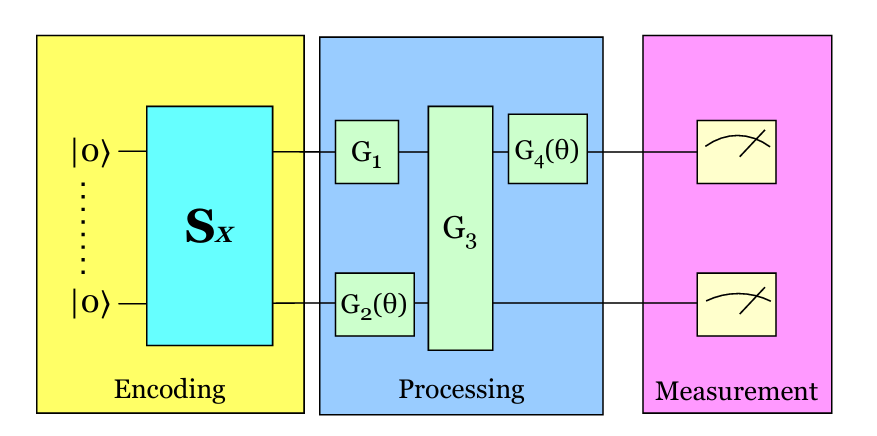
 "alt="Embedded Image" style="width:600px;">

</div>




### 1. Data Encoding (Quantum Feature Mapping)

- **Mapping to Quantum States:**  
  Input data is first encoded into quantum states. This process is akin to a quantum feature map, where classical information is represented in the quantum Hilbert space.

- **Quantum Kernel:**  
  In many QSVM implementations, this mapping enables the computation of a kernel matrix, where the similarity (or inner product) between quantum states is evaluated. This quantum kernel can capture complex relationships in data that might be challenging for classical kernels.

### 2. Quantum Circuit Processing

- **Quantum Gates and Circuits:**  
  Once data is encoded, a series of quantum gates (forming a quantum circuit) is applied. These gates manipulate the quantum states to perform the equivalent of the SVM algorithm’s optimization and decision-making steps.

### 3. Measurement

- **Outcome:**  
  After the quantum operations, a measurement is performed on the output state. The result of this measurement provides the classification outcome, analogous to deciding on which side of the hyperplane a data point lies.




In [10]:
num_qubits=4
device=qml.device('default.qubit',wires=num_qubits)

# Quantum Kernel Support Vector Machine

Instead of using classical kernel functions (e.g., polynomial, Gaussian/RBF kernels), a **Quantum Kernel** is computed using a quantum computer. The idea is to leverage quantum computing’s ability to efficiently map input data into a high-dimensional quantum Hilbert space.

The quantum kernel is computed as:

$$
K(x_i, x_j) = \left| \langle \psi(x_i) \mid \psi(x_j) \rangle \right|^2
$$

where:
- $\psi(x)$ is a quantum state that encodes the classical data \(x\).
- $K(x_i, x_j)$ is the kernel function measuring the similarity between data points \(x_i\) and \(x_j\).

**The QK-SVM circuit using Pennlyne:**

<div style="text-align: center; ">
<img src="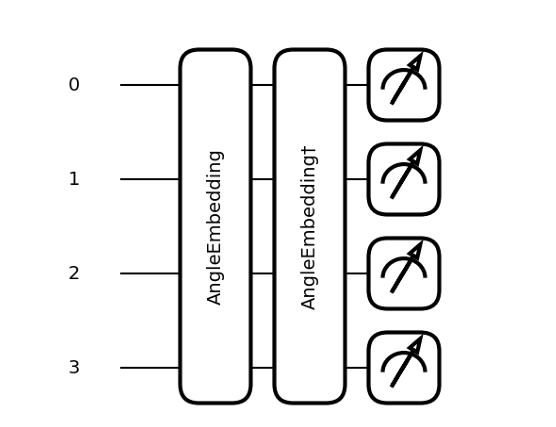
"alt="Embedded Image" style="width:500px;">

</div>

## Steps in Quantum Kernel SVM

1. **Data Encoding (Feature Map Generation)**
   - The classical data \(x\) is encoded into a quantum state using a quantum feature map (quantum circuit).

2. **Quantum Kernel Computation**
   - The kernel matrix is computed using a quantum computer by measuring the inner product of quantum states.

3. **Classical SVM Training**
   - The quantum kernel matrix is used in a classical SVM algorithm to find the optimal decision boundary.

4. **Prediction**
   - New data is classified using the trained SVM model with the quantum kernel.


In [ ]:
@qml.qnode(device)
def qnode(inputs,weights):
    qml.templates.AngleEmbedding(inputs, 
                                 wires=range(num_qubits), 
                                 rotation='Y') # encode the inputs into the quantum state by rotating each qubit along the Y-axis.
    qml.adjoint(qml.AngleEmbedding(features=weights, 
                                   wires=range(num_qubits),
                                    rotation='Y')) # applies the inverse transformation using the weights parameter.
    return qml.probs(wires=range(num_qubits))

In [ ]:
def qkernel(inputs,weights):
    return np.array([[qnode(input,weight)[0] for weight in weights] for input in inputs ]) # compute the quantum kernel

In [13]:
# Fit the model
start_time=time.time()
qsvm=SVC(kernel=qkernel)
qsvm.fit(X_train,Y_train)
end_time=time.time()
print(end_time-start_time)

69.8679552078247


In [14]:
# Make predictions and calculate the accuracy
predictions=qsvm.predict(X_test)
accuracy=accuracy_score(Y_test,predictions)
print(f"the accuracy is: {accuracy:.2f} %")
macrof1=f1_score(Y_test,predictions,average='macro')
print(f"the mocro f1-score is: {mocrof1:.2f}%")
print(classification_report(Y_test,predictions))

the accuracy is: 1.00 %
the mocro f1-score is: 1.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

